### Defect plotting function

This function generates perfect plots of the defect based on defect information.

Parameters:
- defect: list, [defWidth, defHeight, defPosx, defPosy, defAngR]
- index: int, to record the index of the defect, default = -999, 
- array: bool, to plot of transducer array, default = False = do not plot transducer array
- y_shift: int, to shift the plot vertically, default = 0, common values are 0, 50, 60
- backwall: bool, to plot of backwall, default = False = do not plot backwall
- save: bool, to save the generated image, default = False = do not save


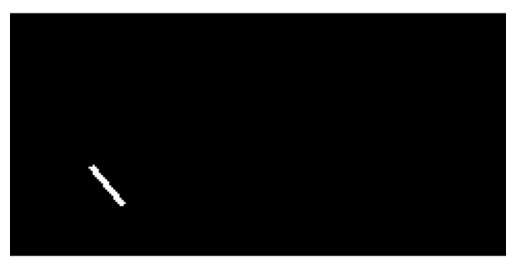

In [10]:
import cv2 as cv
import pandas as pd
import numpy as np
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import axis
import os


# defect plotting function
def plot_defect(defect, index = -999, array = False, y_shift = 0, backwall = False, save = False, crop = False):
    
    # y_shift controls the offset of the image (shift up)
    
    color = (255, 255, 255) # White color
    
    # Extract defect data from the array
    defWidth, defHeight, defPosx, defPosy, defAngR = defect
    
    # define an image
    # np.zeros(height,width)
    
    img = np.zeros((180,240,3), np.uint8)
    
    # Transform defect size to pixel size
    pixel_step = 0.5e-3
    pixel_width = defWidth / pixel_step
    pixel_height = defHeight / pixel_step
    x = np.arange(-0.06, 0.06, pixel_step) # length = 240
    y = np.arange(0, 0.09, pixel_step) # length = 180
    
    # Function that takes in an array and a target value, 
    # return the index of an element that is nearest to the target value
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        # Return index
        return idx
    
    pixel_xc = find_nearest(x, defPosx)
    pixel_yc = 180 - find_nearest(y, defPosy)
    
    # add a negative sign to convert from clockwise to anticlockwise    
    defAngR = -defAngR
    
    # compute sine and cosine
    cos_theta, sin_theta = np.cos(defAngR), np.sin(defAngR)
    
    # let w and h be half of the width and height
    w, h = pixel_width/2, pixel_height/2
    
    # Coordinate: check the notes for details
    # left up corner
    x1, y1 = (pixel_xc - w*cos_theta - h*sin_theta), (pixel_yc - w*sin_theta + h*cos_theta - y_shift)
    # right up corner
    x2, y2 = (pixel_xc + w*cos_theta - h*sin_theta), (pixel_yc + w*sin_theta + h*cos_theta - y_shift)
    # right down corner
    x3, y3 = (pixel_xc + w*cos_theta + h*sin_theta), (pixel_yc + w*sin_theta - h*cos_theta - y_shift)
    # left down corner
    x4, y4 = (pixel_xc - w*cos_theta + h*sin_theta), (pixel_yc - w*sin_theta - h*cos_theta - y_shift)
    
    pts = np.array([[x1, y1],[x2, y2],[x3, y3],[x4, y4]], np.int32)
    
    # reformat the points
    pts = pts.reshape((-1,1,2))
    
    img = cv.fillPoly(img,[pts], color) 
    
    if backwall == True:
        
        w = 240
        h = 1 #defHeight / pixel_step
        
        # Coordinate: check the notes for details
        # left up corner
        x1, y1 = (240/2 - w), (180 + h - y_shift)
        # right up corner
        x2, y2 = (240/2 + w), (180 + h - y_shift)
        # right down corner
        x3, y3 = (240/2 + w), (180 - h - y_shift)
        # left down corner
        x4, y4 = (240/2 - w), (180 - h - y_shift)
        
        pts = np.array([[x1, y1],[x2, y2],[x3, y3],[x4, y4]], np.int32)
    
        # reformat the points
        pts = pts.reshape((-1,1,2))

        img = cv.fillPoly(img,[pts], color) 
        
    if array == True:
        
        w = 240
        h = 1
        
        # Coordinate: check the notes for details
        # left up corner
        x1, y1 = (240/2 - w), (60 + h - y_shift)
        # right up corner
        x2, y2 = (240/2 + w), (60 + h - y_shift)
        # right down corner
        x3, y3 = (240/2 + w), (60 - h - y_shift)
        # left down corner
        x4, y4 = (240/2 - w), (60 - h - y_shift)
        
        pts = np.array([[x1, y1],[x2, y2],[x3, y3],[x4, y4]], np.int32)
    
        # reformat the points
        pts = pts.reshape((-1,1,2))

        img = cv.fillPoly(img,[pts], color) 
    
    else: pass
    
    if crop == True:
        if y_shift == 0:
            img = img[60:,:]
        elif y_shift == 60:
            img = img[:-60,:]

    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.axis('off')
    
    if save == True:

        # Directory
        directory = "py_output_fig_no_backwall"

        # Parent Directory path
        parent_dir = "/Users/chenkangan/PycharmProjects/ME4_FYP_py"

        # Path
        path = os.path.join(parent_dir, directory)
        
        # Check whether the directory exists
        isExist = os.path.exists(path)
        
        if isExist is False:
            # Create the directory if not exist
            os.mkdir(path)
            print("Directory '% s' created" % directory)
        
        # plt.tight_layout()
        # plt.savefig(f'{path}/defect_{index}_yshift_{y_shift}.png', bbox_inches='tight', pad_inches=0)
        # img = Image.fromarray(img,'RGB')
        
        # Save the image as a black white image
        img = np.squeeze(img[:,:,0])
        # print(f'Image size is {img.shape}')
        img = Image.fromarray(img,'L')
        img.save(f'{path}/defect_{index}_yshift_{y_shift}.png')
        
    return None

# same rectangle but different angle of rotation
# defWidth, defHeight, defPosx, defPosy, defAngR

# defect = [0.0327, 0.0010, -0.0382, 0.0107, 1.1677]
defect = [0.0287, 0.0010, -0.0189, 0.0375, -0.5626]
defect = [0.0128, 0.0010, -0.0390, 0.0194, -1.5085]
defect = np.array('0.0120    0.0010   -0.0365    0.0174   -0.8899'.split('   ')).astype(float)
plot_defect(defect, array = True, backwall = True, save = False, y_shift = 60, crop = True)   

In [15]:
a = np.linspace(1,100,100).reshape(4,25)
a[1:,:]

array([[ 26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
         37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
         48.,  49.,  50.],
       [ 51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,
         62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
         73.,  74.,  75.],
       [ 76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
         87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
         98.,  99., 100.]])

### Check the defect

Make sure the defect dose not exceed the boundary of the frame.

In [8]:
import pandas as pd
df = pd.read_csv('RandomDefect.csv')
df.head()


,index,defWidth,defHeight,defPosx,defPosy,defAngR,timestamp
0,1,0.020618,0.001,-0.009472,0.033620,-1.464321,24-Nov-2022 09:21:18
1,2,0.047034,0.001,-0.004513,0.021404,-0.562620,24-Nov-2022 09:21:18
2,3,0.061528,0.001,-0.003834,0.029028,-0.433420,24-Nov-2022 09:21:18
3,4,0.007864,0.001,0.033100,0.034993,-1.335512,24-Nov-2022 09:21:18
4,5,0.041474,0.001,-0.025216,0.025541,-1.378310,24-Nov-2022 09:21:18


In [9]:
defWidth = np.array(df['defWidth'])
defHeight = np.array(df['defHeight'])
defPosx = np.array(df['defPosx'])
defPosy = np.array(df['defPosy'])
defAngR = np.array(df['defAngR'])

# add a negative sign to convert from clockwise to anticlockwise    
defAngR = -defAngR

# compute sine and cosine
cos_theta, sin_theta = np.cos(defAngR), np.sin(defAngR)

# let w and h be half of the width and height
w, h = defWidth/2, defHeight/2

# Coordinate: check the notes for details
# left up corner
x1, y1 = (defPosx - w*cos_theta - h*sin_theta), (defPosy - w*sin_theta + h*cos_theta)
# right up corner
x2, y2 = (defPosx + w*cos_theta - h*sin_theta), (defPosy + w*sin_theta + h*cos_theta)
# right down corner
x3, y3 = (defPosx + w*cos_theta + h*sin_theta), (defPosy + w*sin_theta - h*cos_theta)
# left down corner
x4, y4 = (defPosx - w*cos_theta + h*sin_theta), (defPosy - w*sin_theta - h*cos_theta)

print(max(max(x1),max(x2),max(x3),max(x4)) <= 0.055)
print(min(min(x1),min(x2),min(x3),min(x4)) >= -0.055)
print(max(max(y1),max(y2),max(y3),max(y4)) <= 0.055)
print(min(min(y1),min(y2),min(y3),min(y4)) >= 0.005)

True
True
True
True


### Join defect record together

Information of defects are stored in different csv file. This functions joins these csv files together to generate a dataframe with all the defects.

In [26]:
#import the modules
import os
import pandas as pd
import glob


def join_defect():
    #read the path
    file_path = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/defect_record"
    #list all the files from the directory
    file_list = os.listdir(file_path)

    df_concat = pd.concat([pd.read_csv(f'{file_path}/{filename}', encoding='latin1') for filename in file_list], ignore_index=True)
    df_concat = df_concat.sort_values('index').set_index('index')
    df_concat.drop(['Unnamed: 0'], axis = 1, inplace=True)
    df_concat.dropna(inplace=True)
    df_concat.to_csv('/Users/chenkangan/PycharmProjects/ME4_FYP_py/defect_2010.csv')
    
    return df_concat

df_concat = join_defect()
df_concat

,defWidth,defHeight,defPosx,defPosy,defAng,defAngR,timestamp
index,,,,,,,
1.0,0.038975,0.001,-0.015391,0.012456,19.232234,0.335666,30-Nov-2022 17:12:55
2.0,0.018667,0.001,0.030236,0.019037,40.359892,0.704413,30-Nov-2022 17:14:04
3.0,0.002469,0.001,0.007463,0.020836,5.961896,0.104055,30-Nov-2022 17:15:14
4.0,0.009889,0.001,0.034089,0.017002,-68.774938,-1.200349,30-Nov-2022 17:16:21
5.0,0.029190,0.001,-0.023694,0.046207,-23.807595,-0.415521,30-Nov-2022 17:17:29
...,...,...,...,...,...,...,...
2006.0,0.023096,0.001,0.014303,0.020935,-33.080650,-0.577366,31-Jan-2023 21:46:00
2007.0,0.035786,0.001,-0.033181,0.025029,79.913842,1.394760,31-Jan-2023 21:47:08
2008.0,0.022652,0.001,0.019007,0.046597,25.759587,0.449590,31-Jan-2023 21:48:18


## Save images

In [11]:
df_concat = pd.read_csv('/Users/chenkangan/PycharmProjects/ME4_FYP_py/defect_2010.csv')

df_concat = df_concat.set_index('index')

Percentage completion: 5.0%


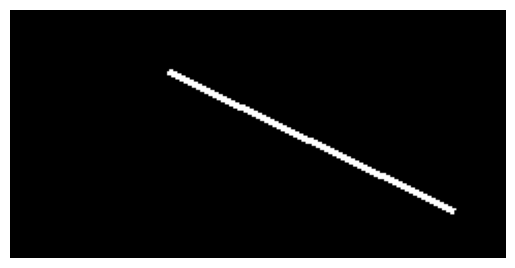

In [16]:
# Plot defect based on the index
for i in range(100,101):
    defect = list(df_concat.loc[i])
    defect = defect[:4] + [defect[5]]
    # plot_defect(defect, index = i, y_shift = 50, array = True, backwall = True, save = False)
    plot_defect(defect, index = i, y_shift = 60, array = False, backwall = False, save = False, crop = True)
    print(f'Percentage completion: {round(i/2000*100, 2)}%')

### Image comparison

Compare the images / plots generated by ML and matlab.

(180, 240)


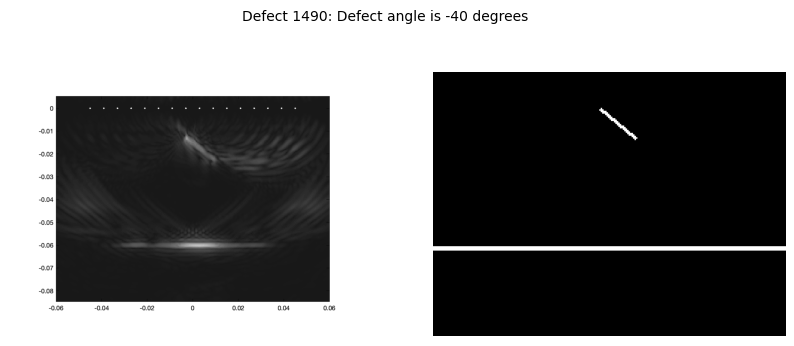

(180, 240)


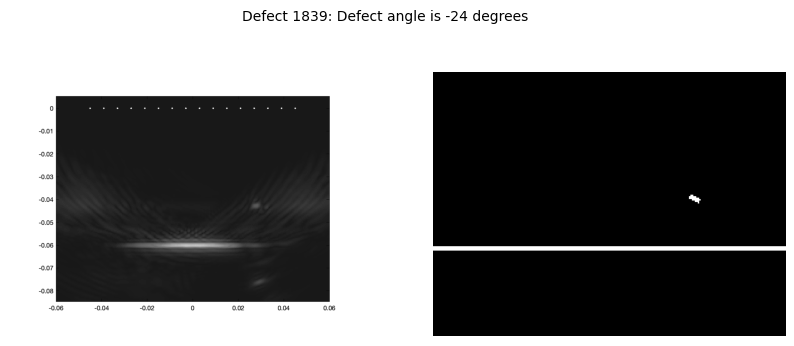

(180, 240)


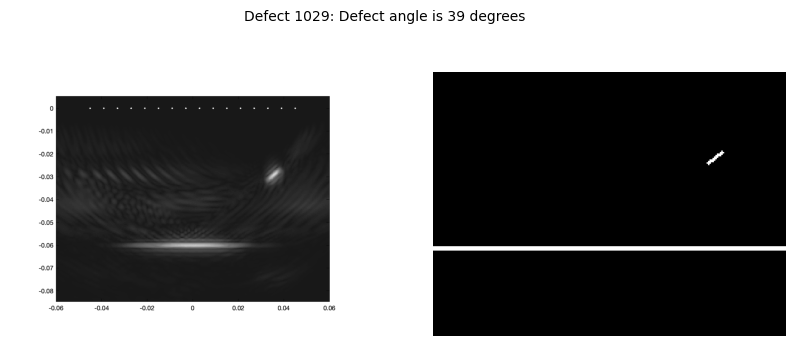

(180, 240)


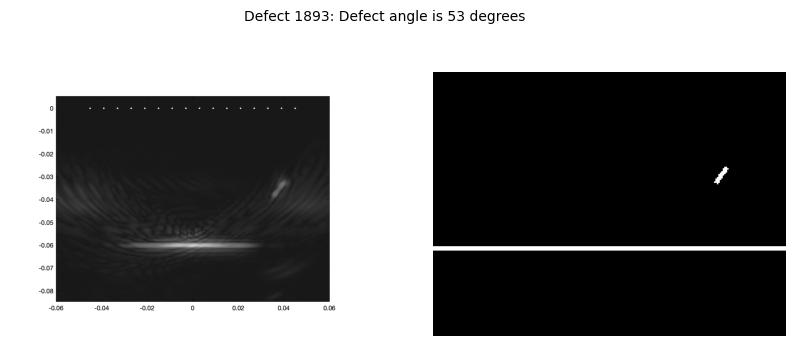

(180, 240)


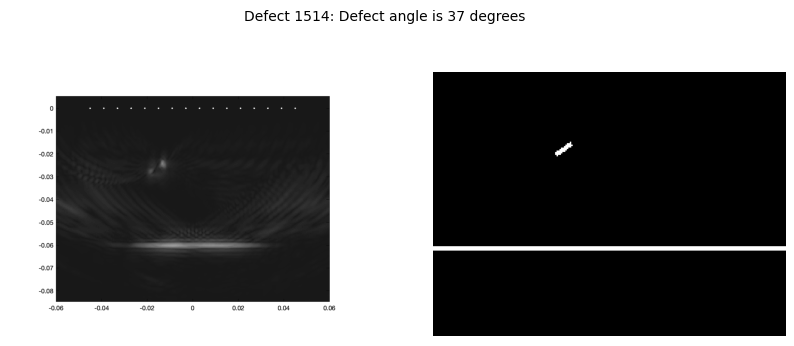

(180, 240)


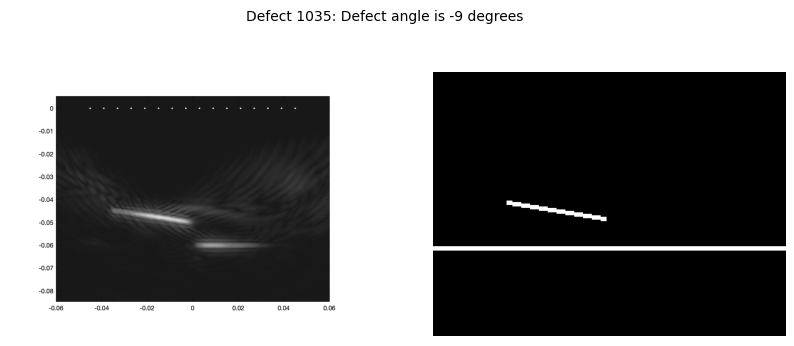

(180, 240)


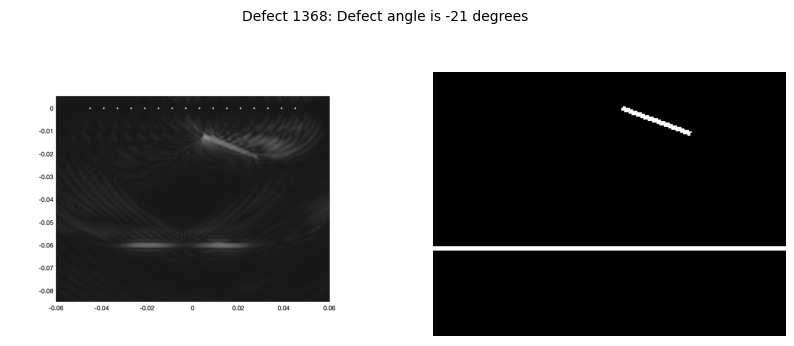

(180, 240)


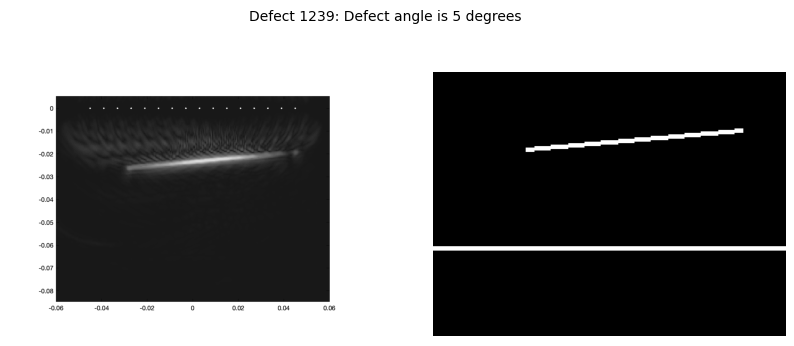

(180, 240)


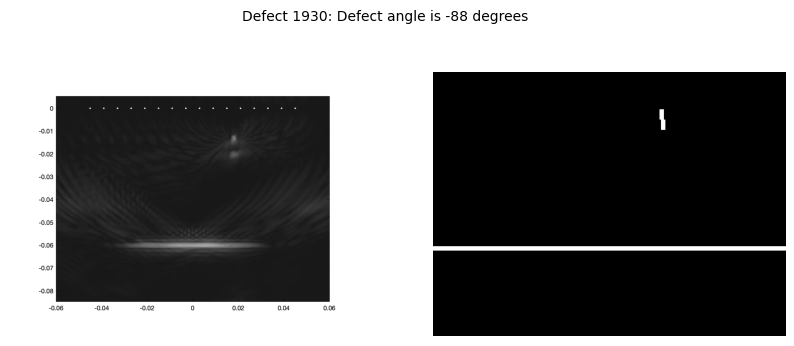

(180, 240)


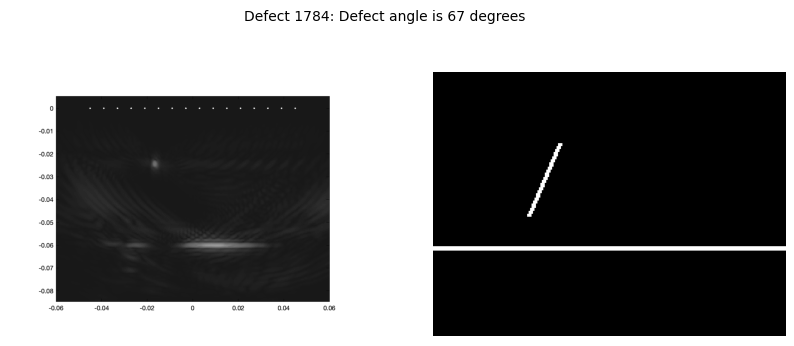

(180, 240)


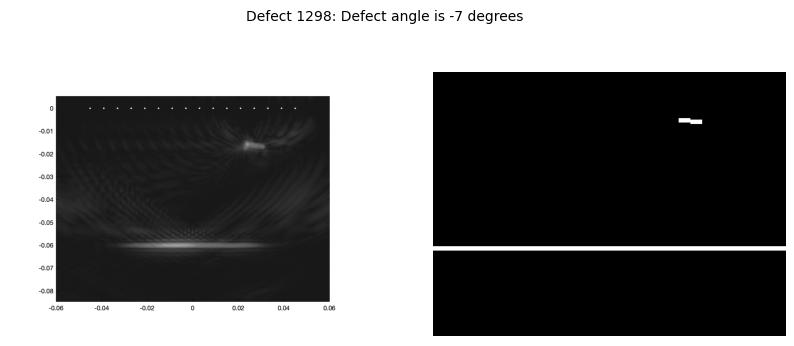

(180, 240)


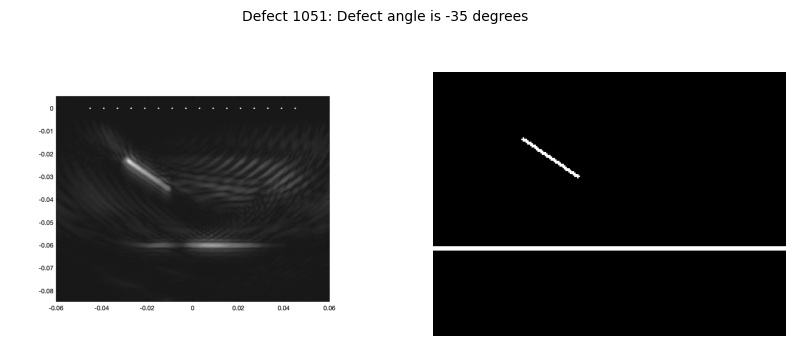

(180, 240)


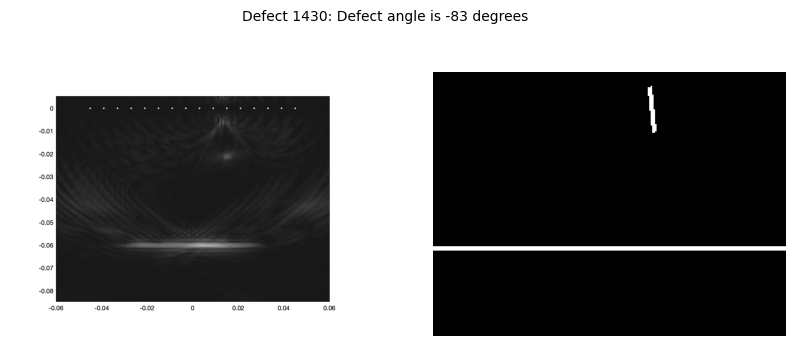

(180, 240)


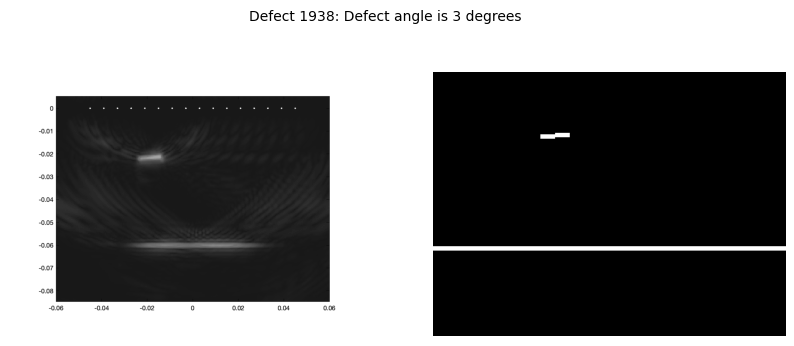

(180, 240)


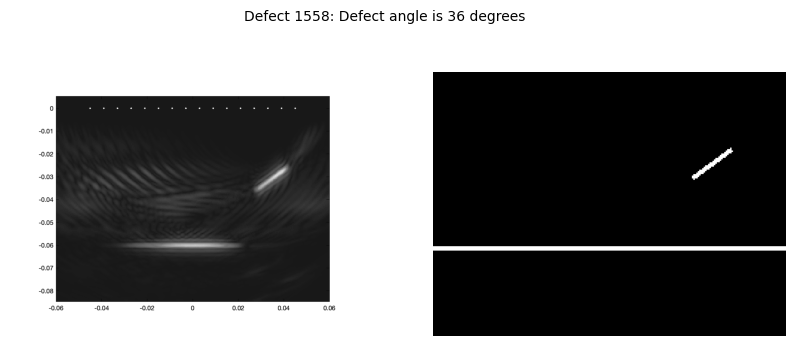

(180, 240)


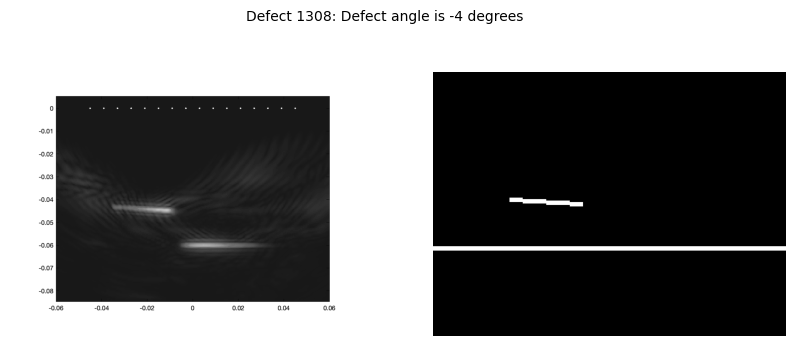

(180, 240)


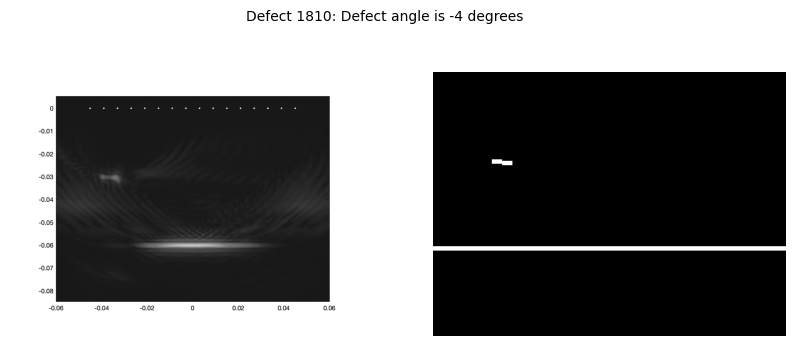

(180, 240)


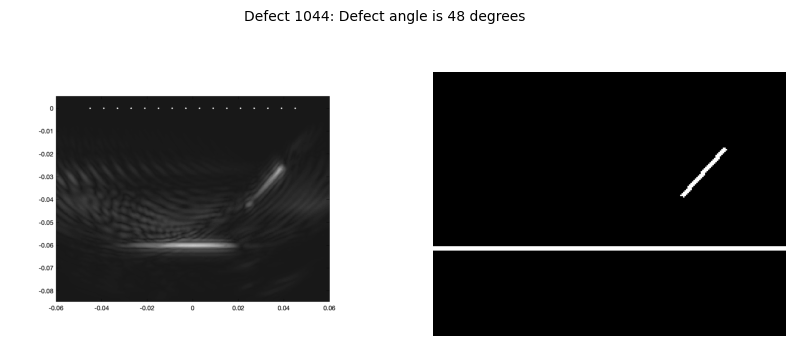

(180, 240)


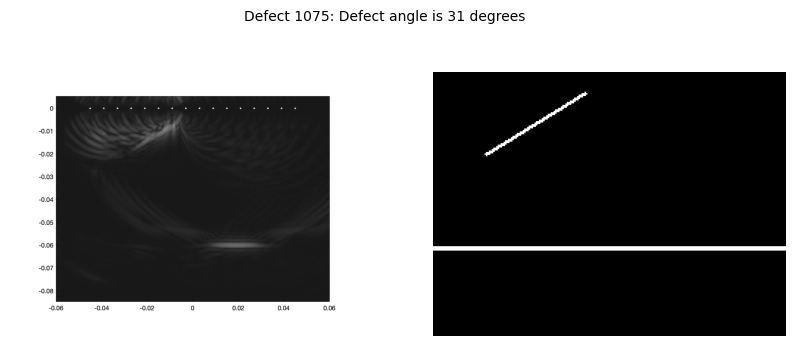

(180, 240)


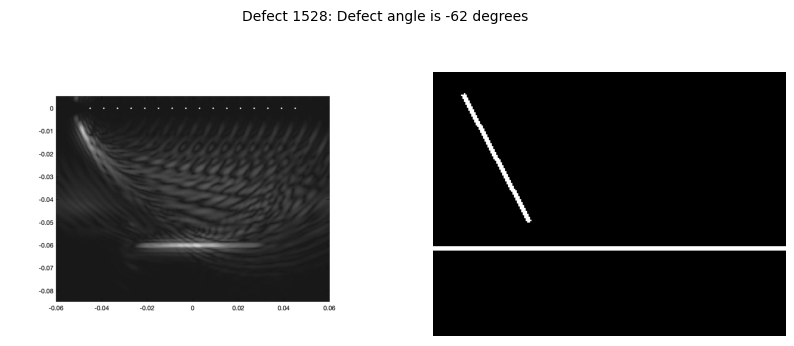

In [5]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import random
import cv2 as cv

# df_concat = join_defect()
df_concat = pd.read_csv('/Users/chenkangan/PycharmProjects/ME4_FYP_py/defect_2000.csv')
df_concat = df_concat.set_index('index')

dirName_das = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/DAS_Figure"
dirName_das_fmc = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/DAS_Figure_FMC"
dirName_py = "/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig"

#Randomly sample defect from 1-150
sample_size = 20
sample_list = [random.randint(1000,2000) for i in range(sample_size)]

for i in sample_list:
    
    defect = list(df_concat.loc[i])
    defAng = round(defect[4])
    
    f = plt.figure(figsize=(10,4))
    
    # Read image in normal colorful scale
#     image_das_fmc = mpimg.imread(f'{dirName_das_fmc}/Figure_{i}_fmc.png')
#     image_py = mpimg.imread(f'{dirName_py}/defect_{i}_yshift_60.png')

    # Read image in greyscale
    image_das_fmc = cv.imread(f'{dirName_das_fmc}/Figure_{i}_fmc.png',cv.IMREAD_GRAYSCALE)  # convert to array
    image_py = cv.imread(f'{dirName_py}/defect_{i}_yshift_60.png',cv.IMREAD_GRAYSCALE)  # convert to array
    print(image_py.shape)
    
    ax = f.add_subplot(121)
    ax2 = f.add_subplot(122)
    ax.imshow(image_das_fmc, cmap='gray')
    ax.axis('off')
    ax2.imshow(image_py, cmap='gray')
    ax2.axis('off')
    f.suptitle(f'Defect {i}: Defect angle is {defAng} degrees', fontsize=10)
    
    plt.show()

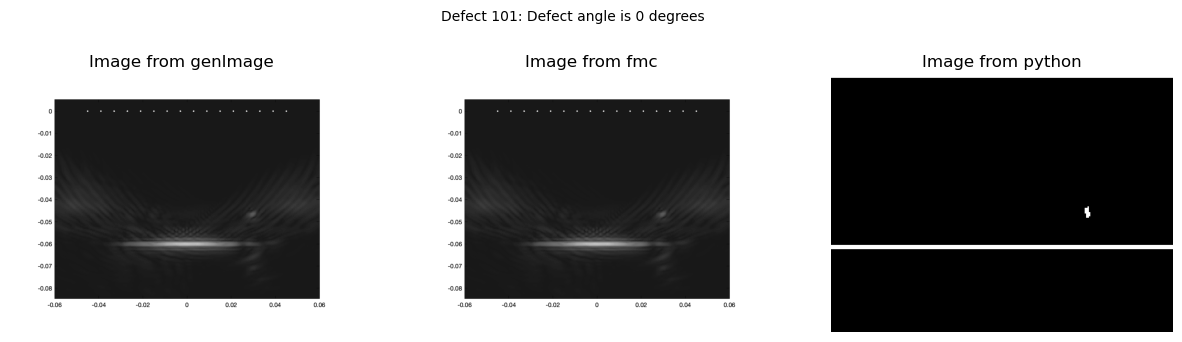

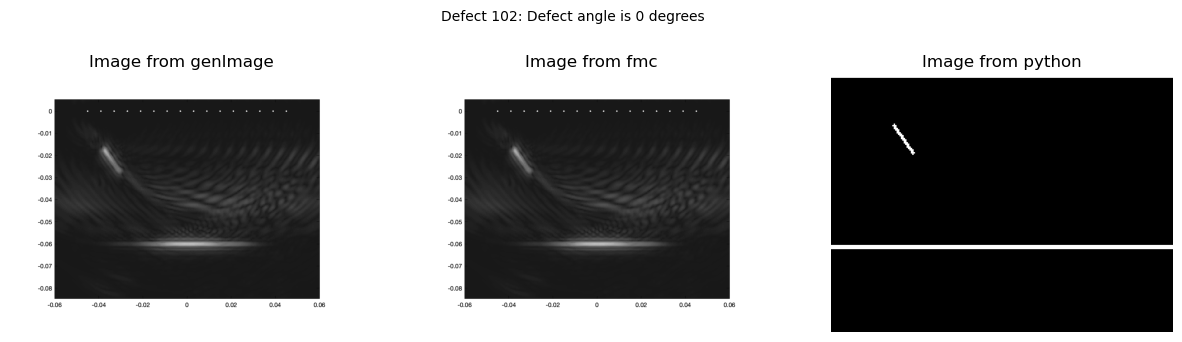

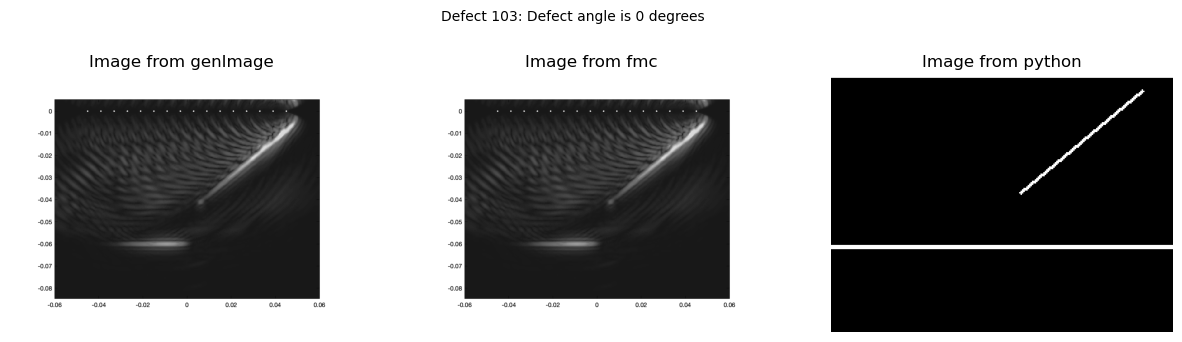

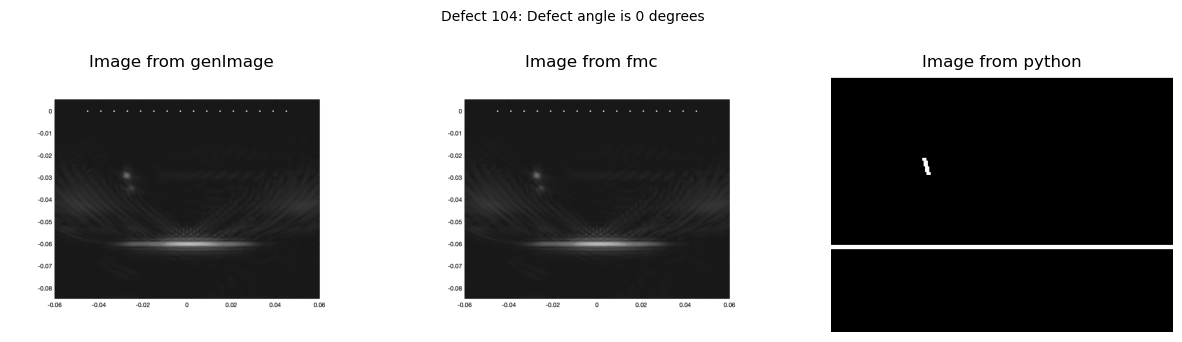

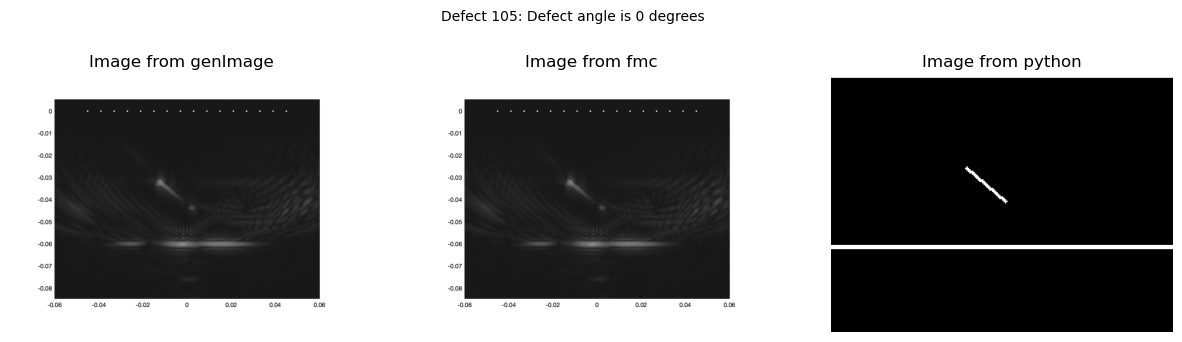

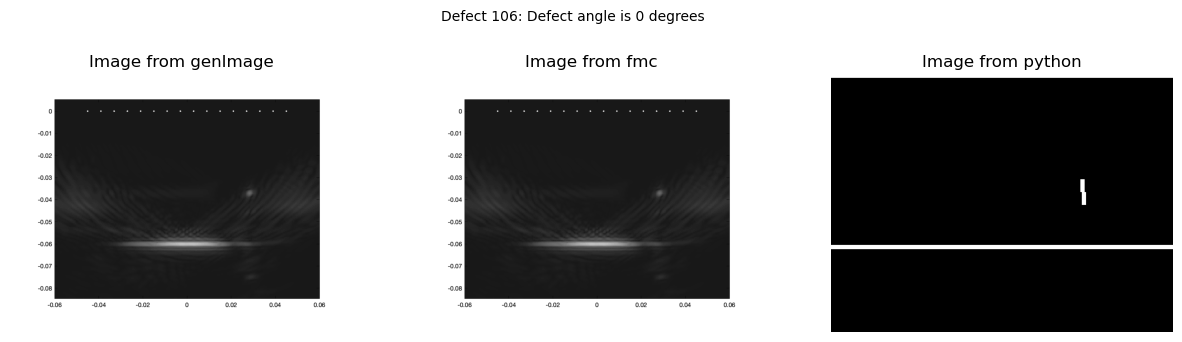

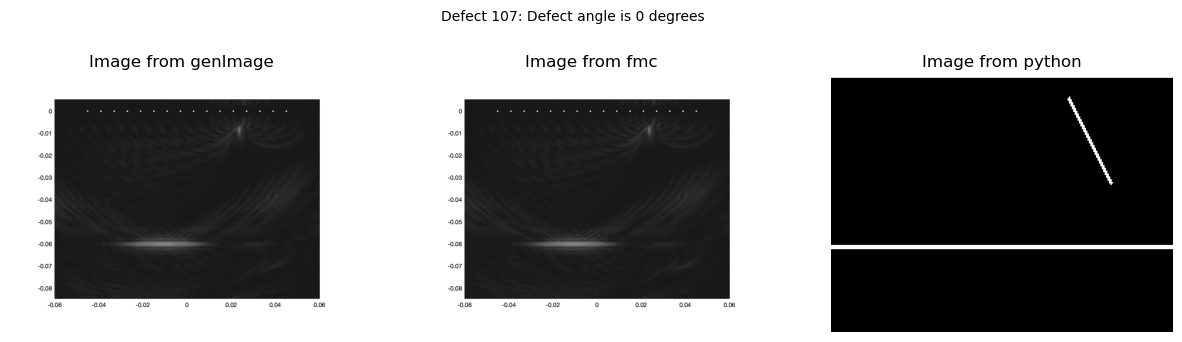

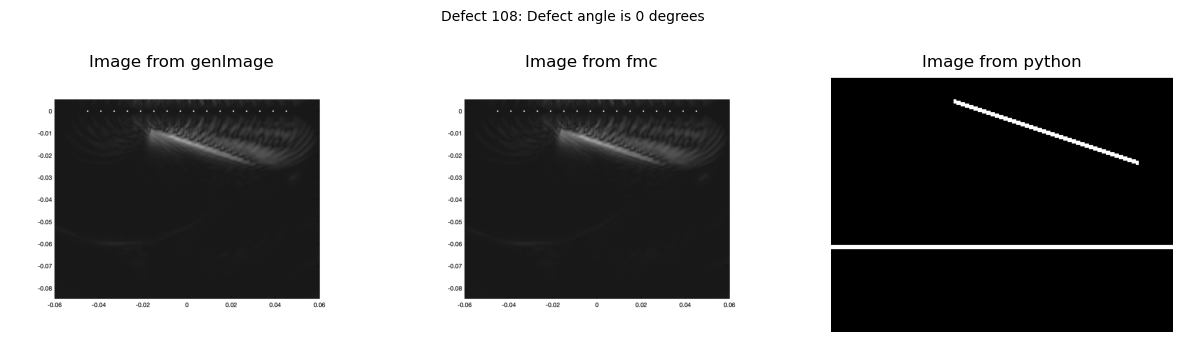

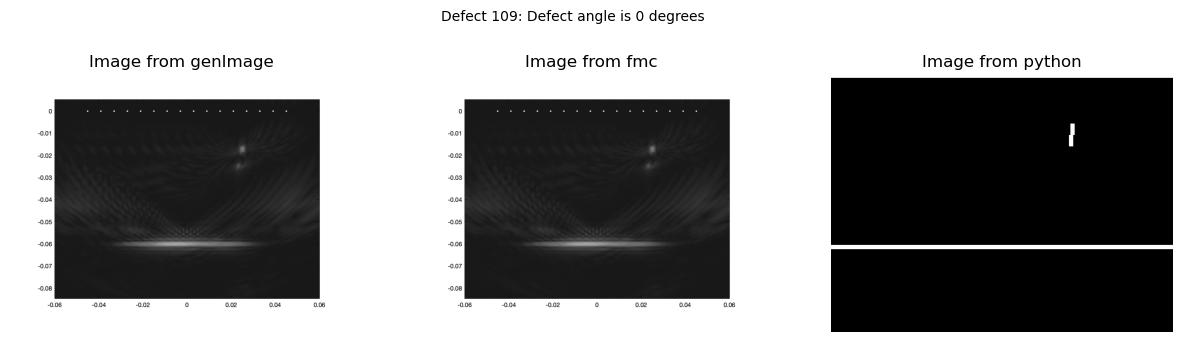

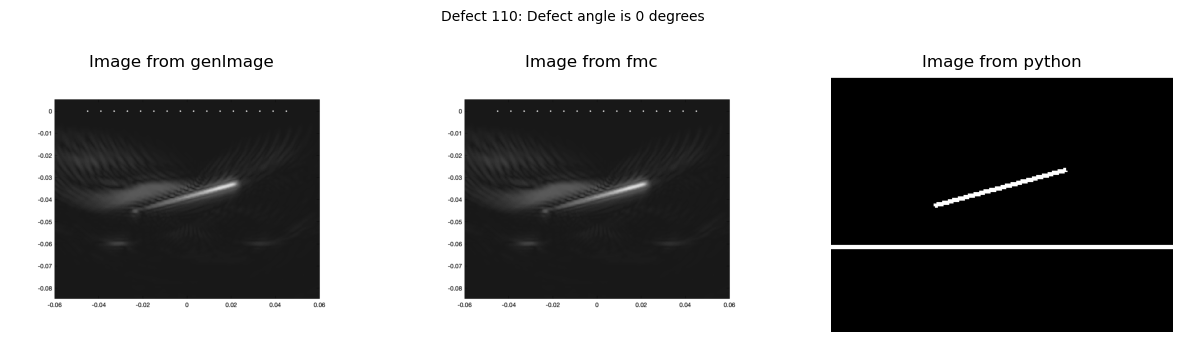

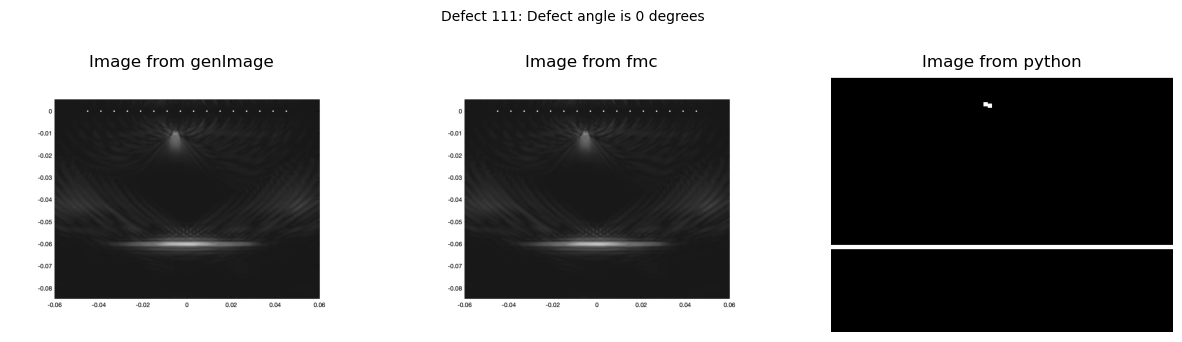

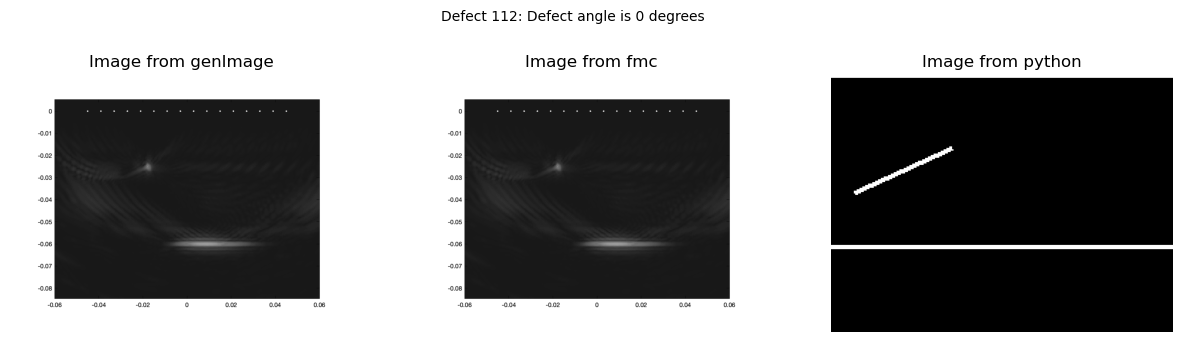

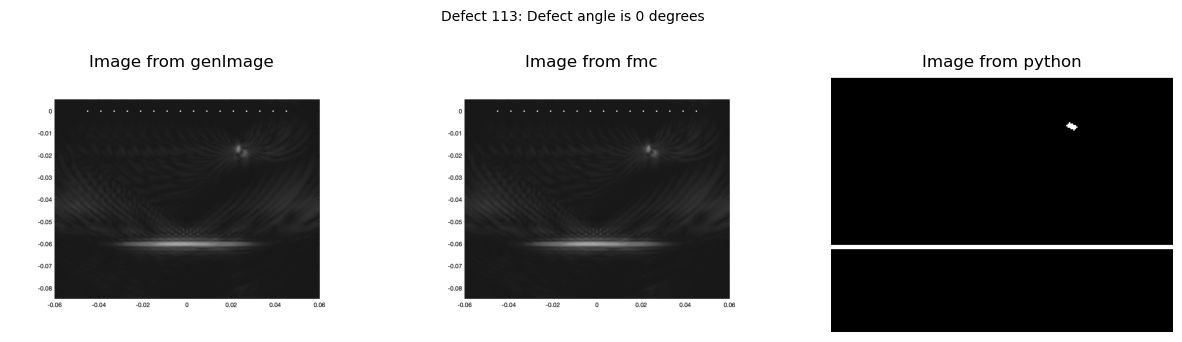

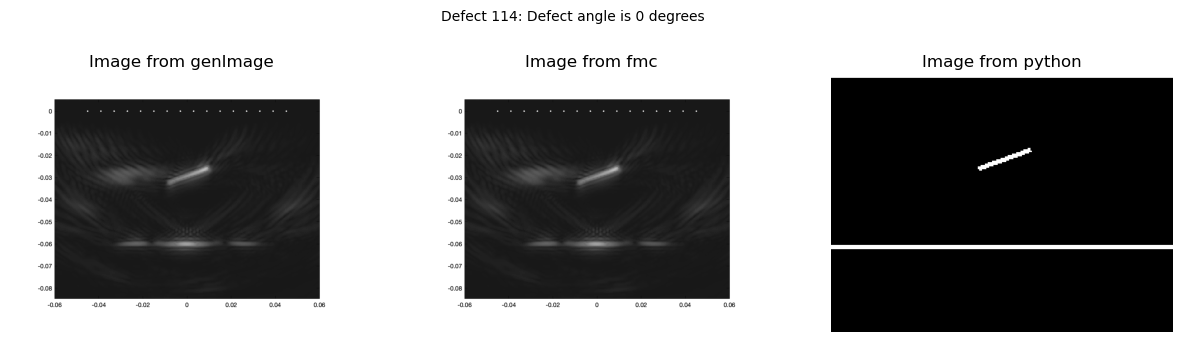

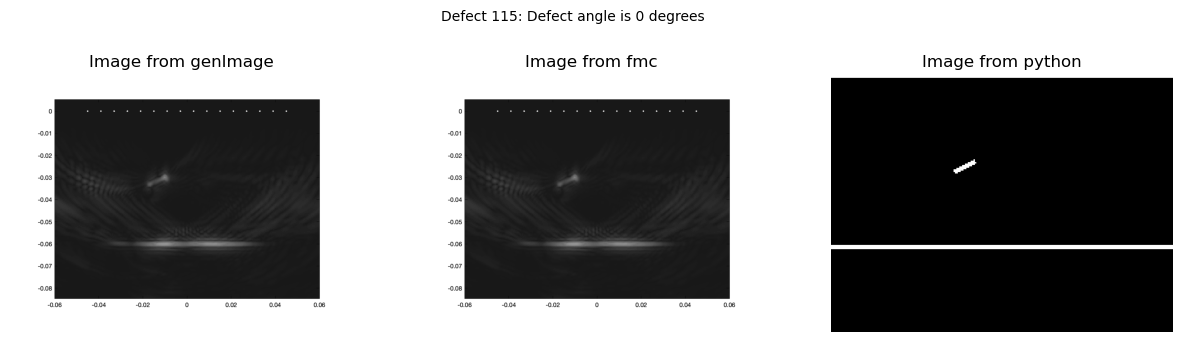

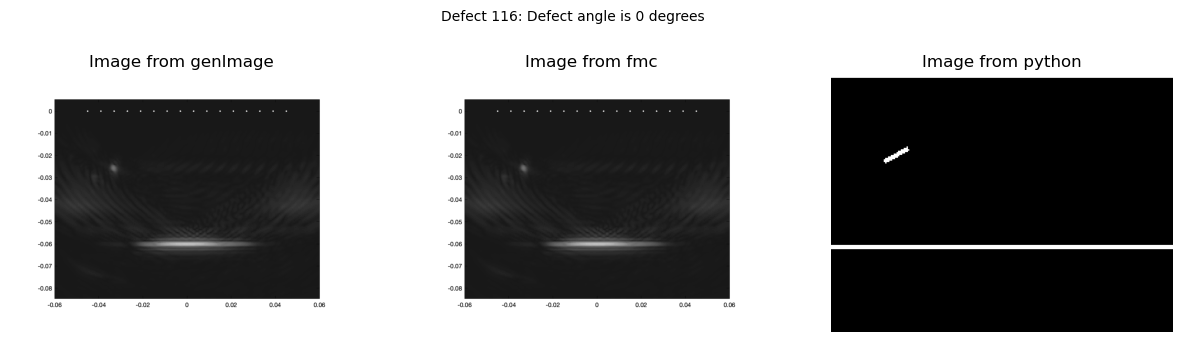

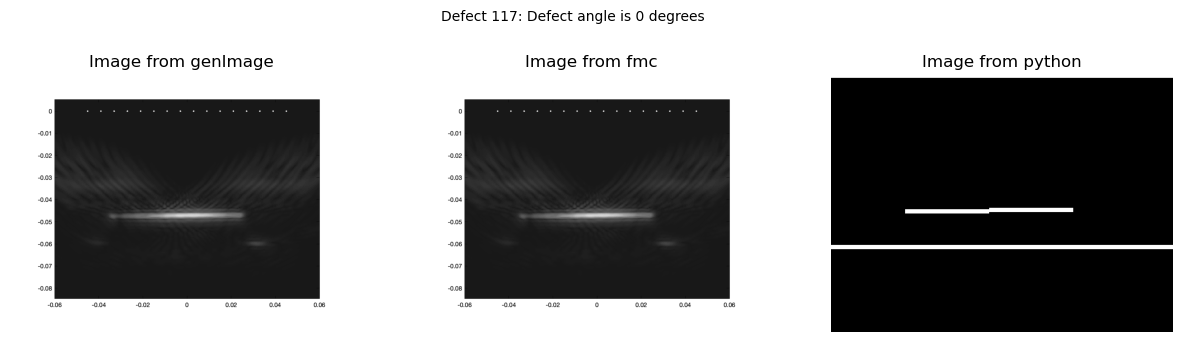

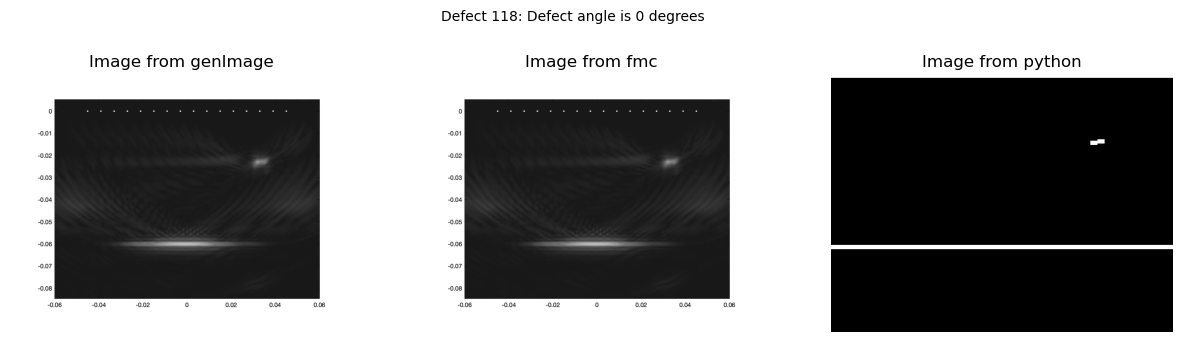

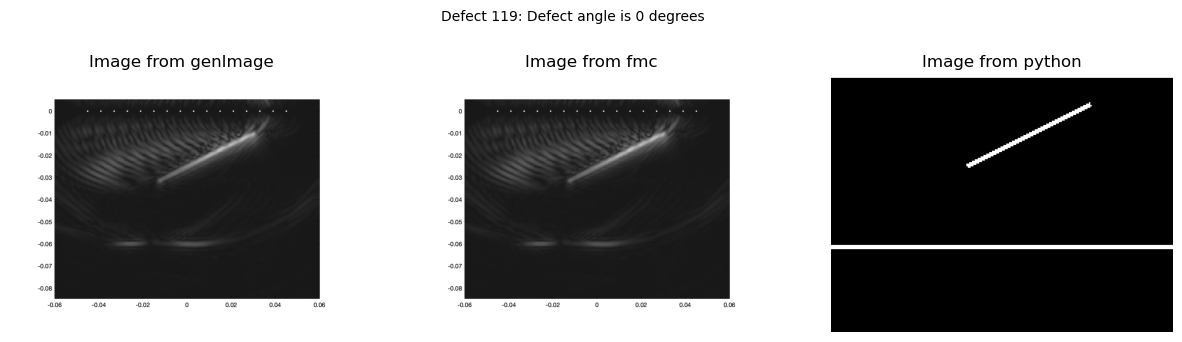

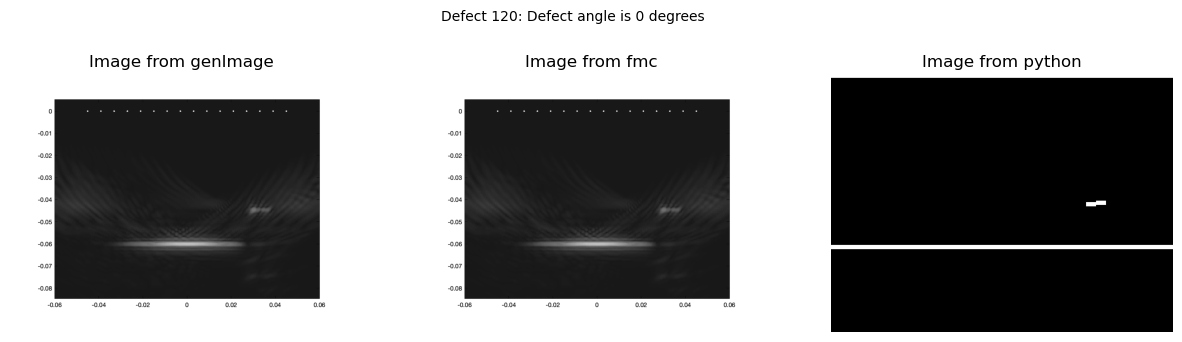

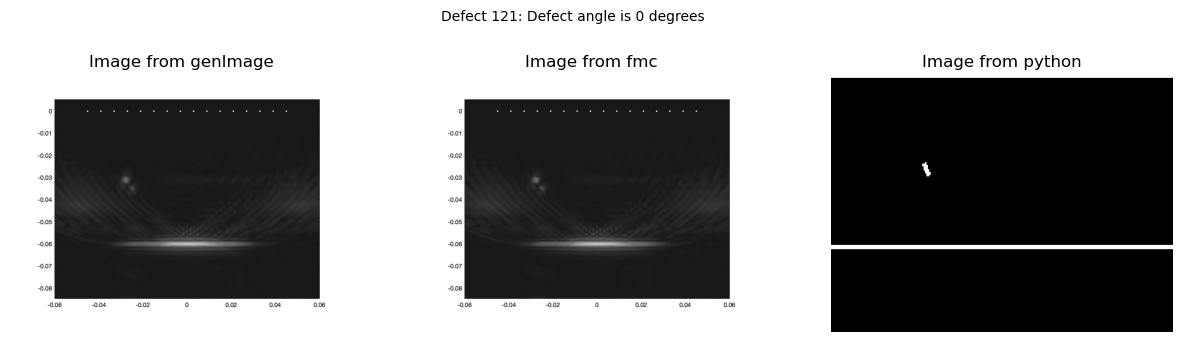

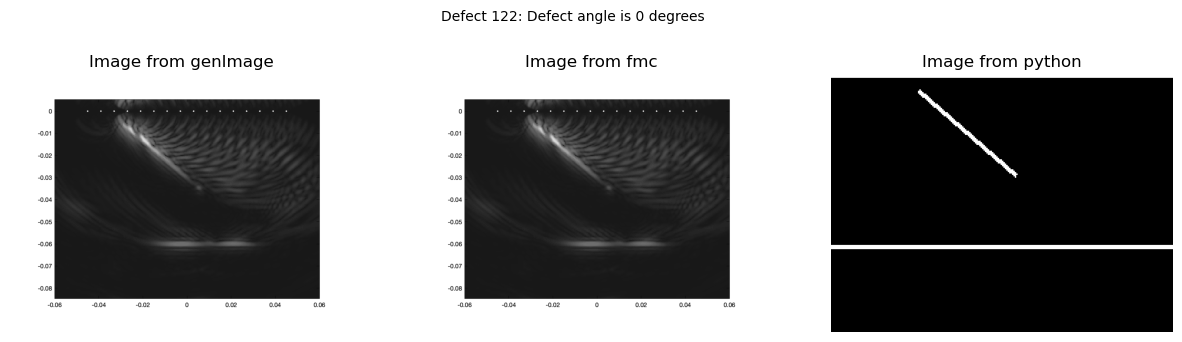

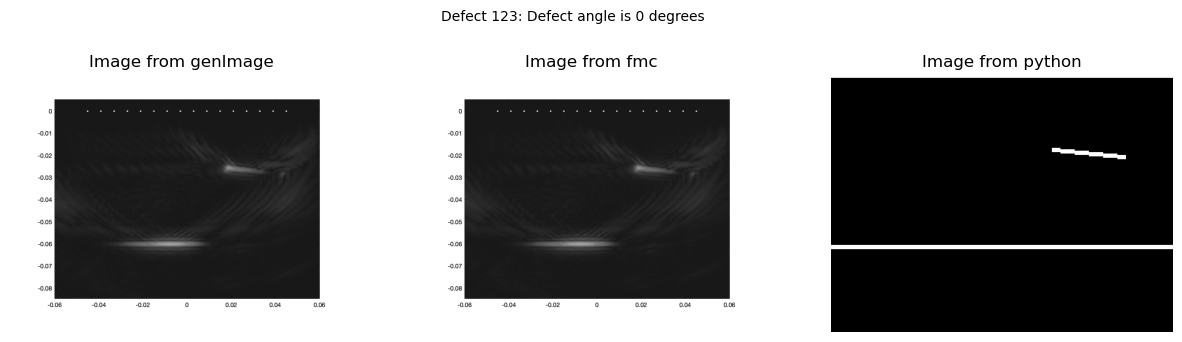

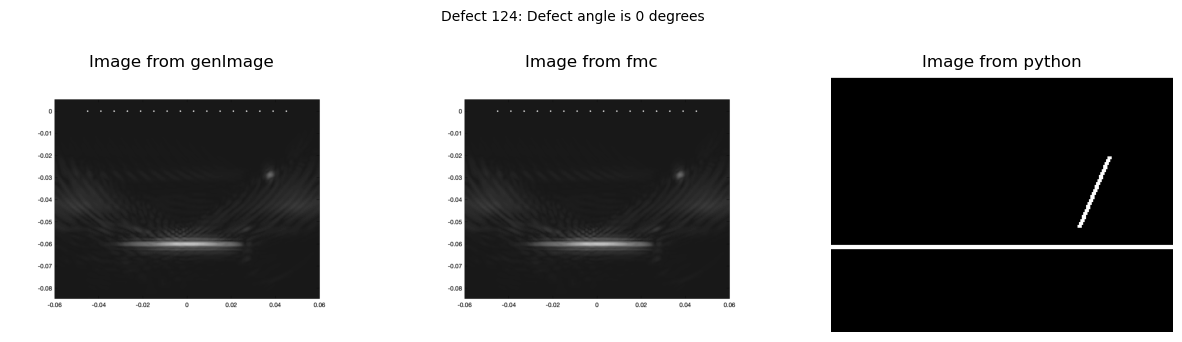

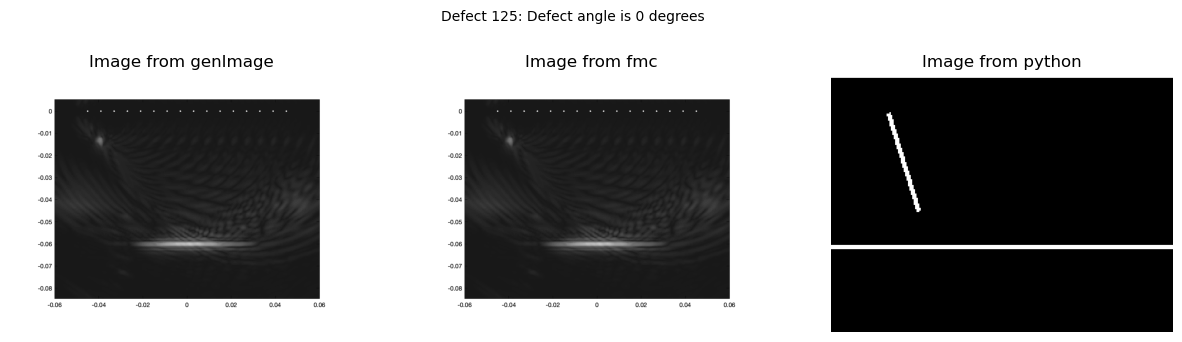

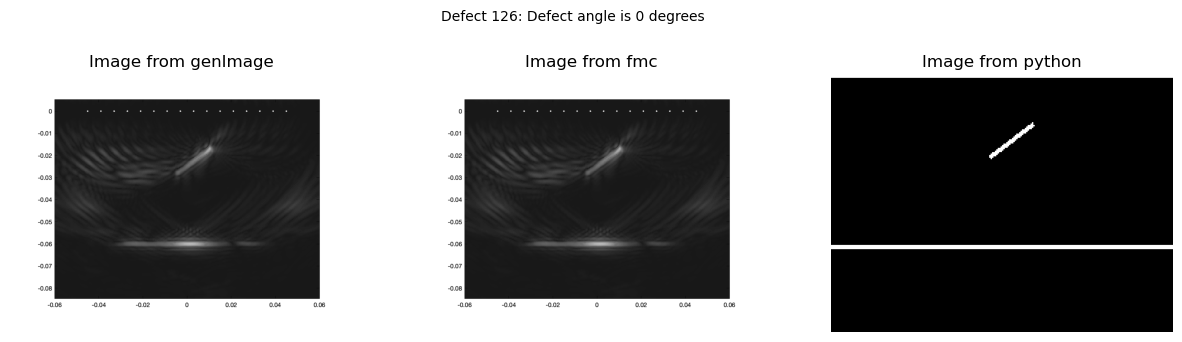

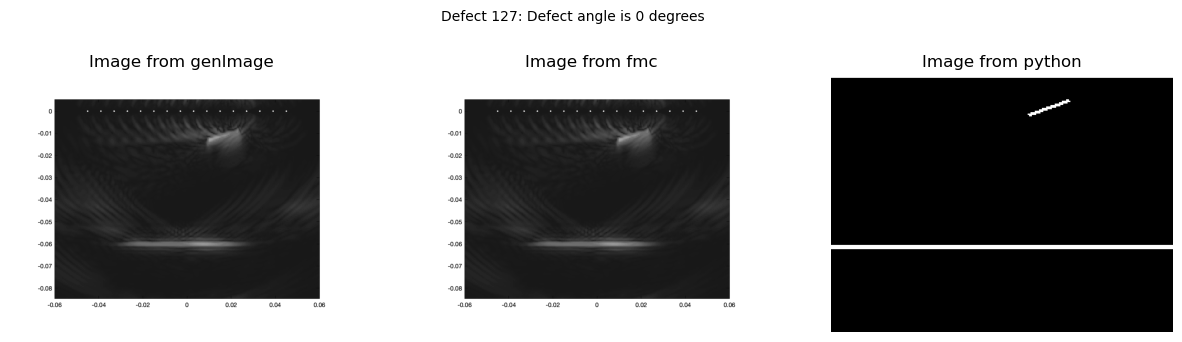

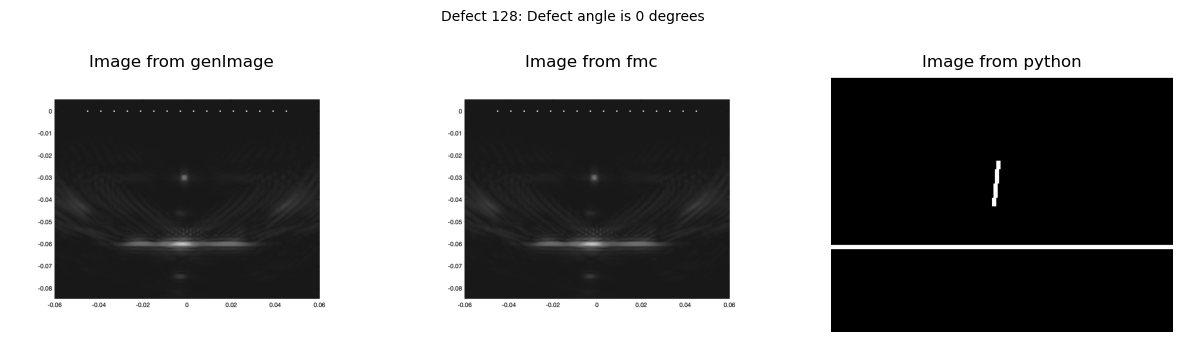

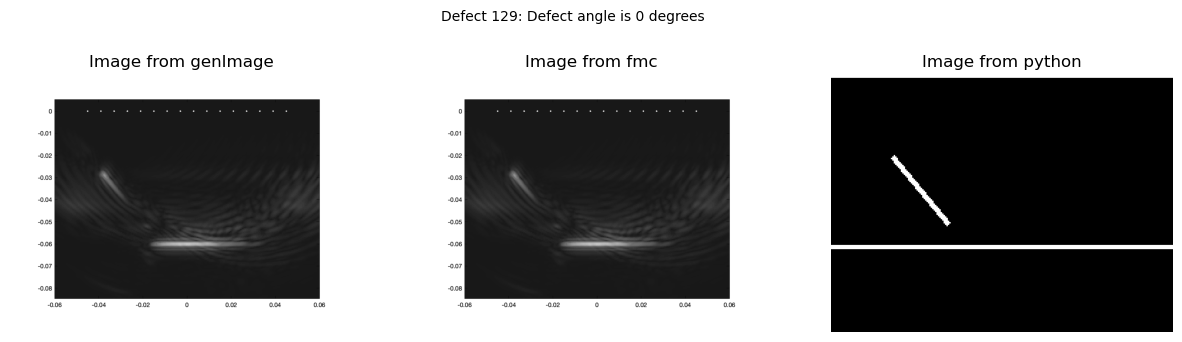

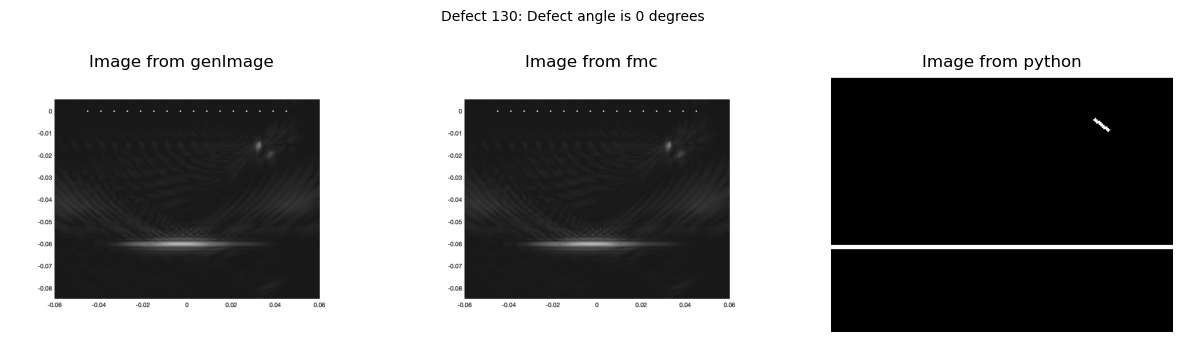

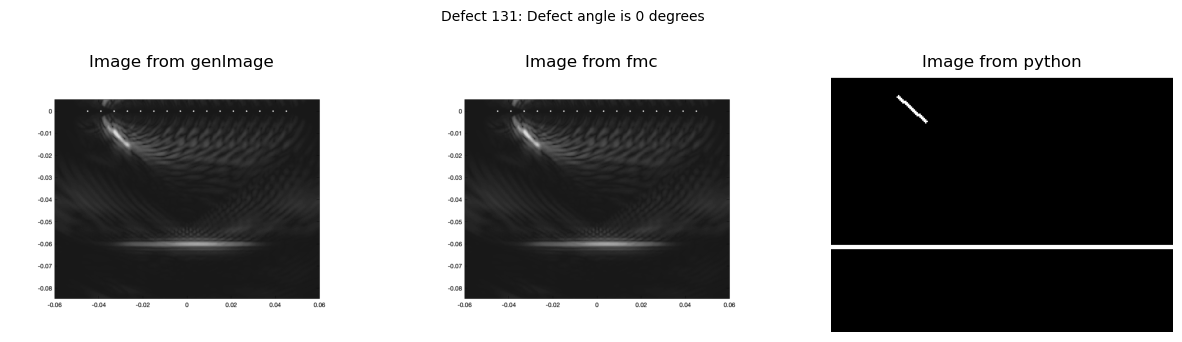

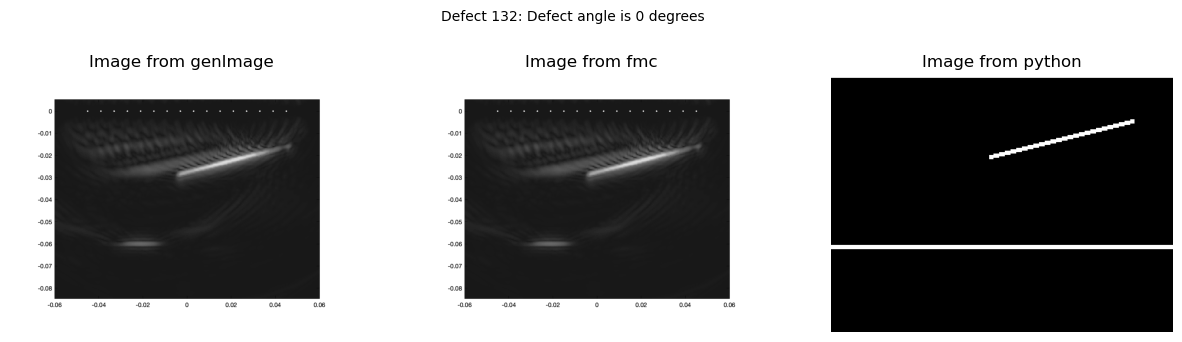

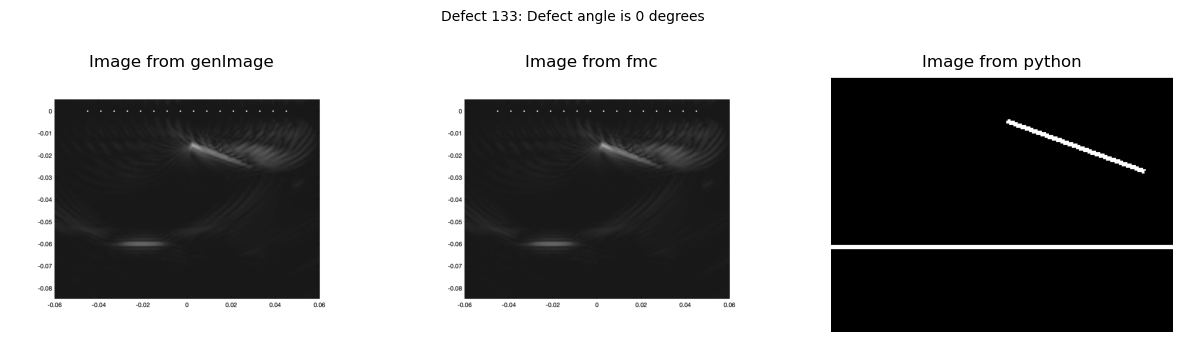

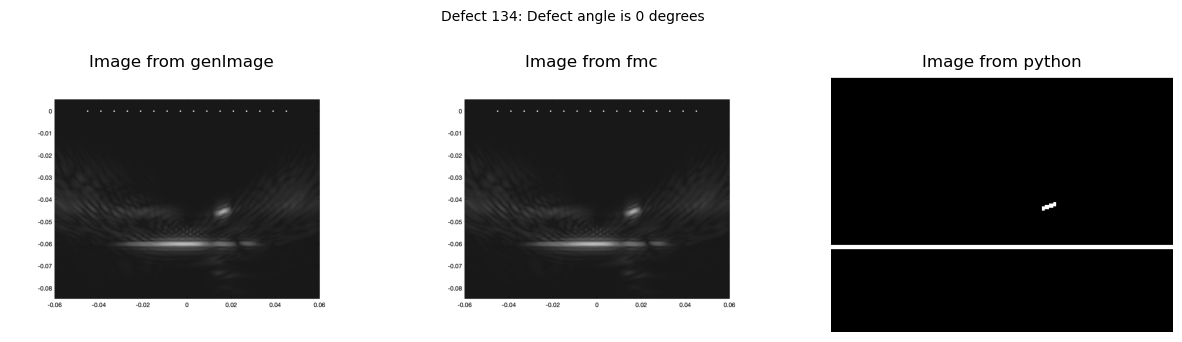

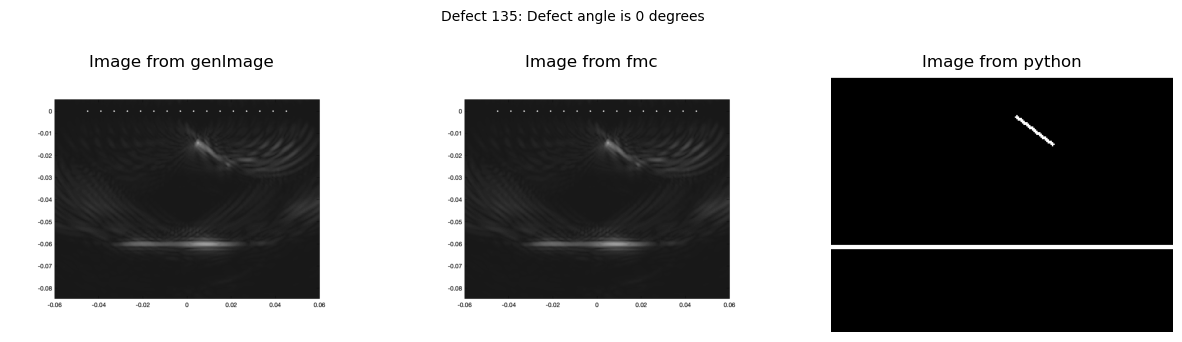

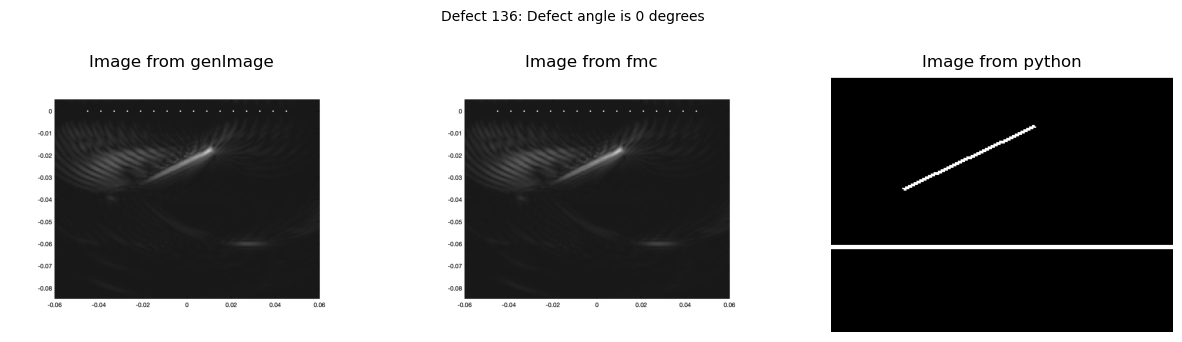

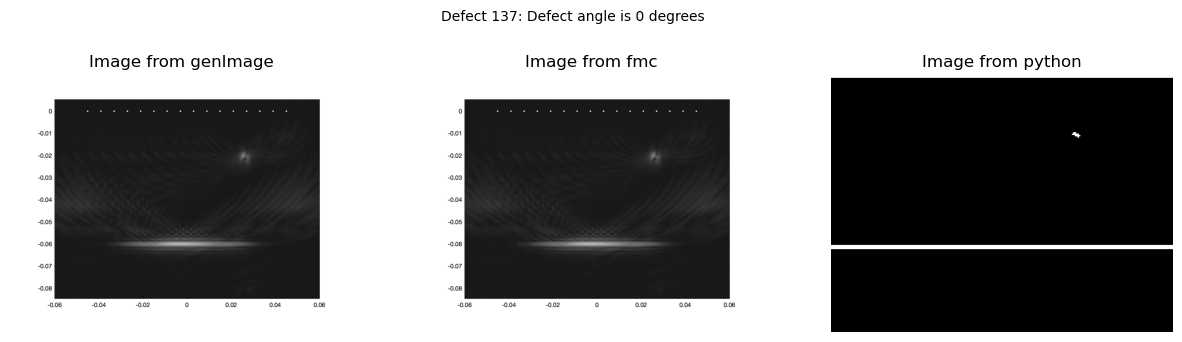

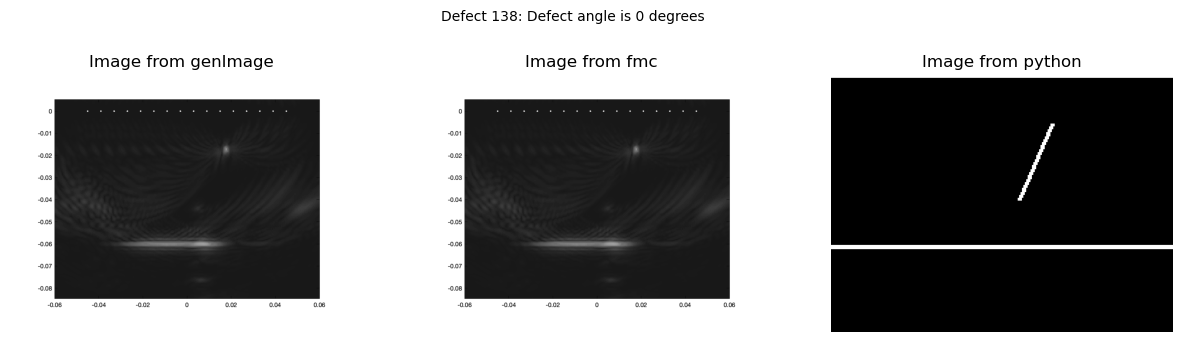

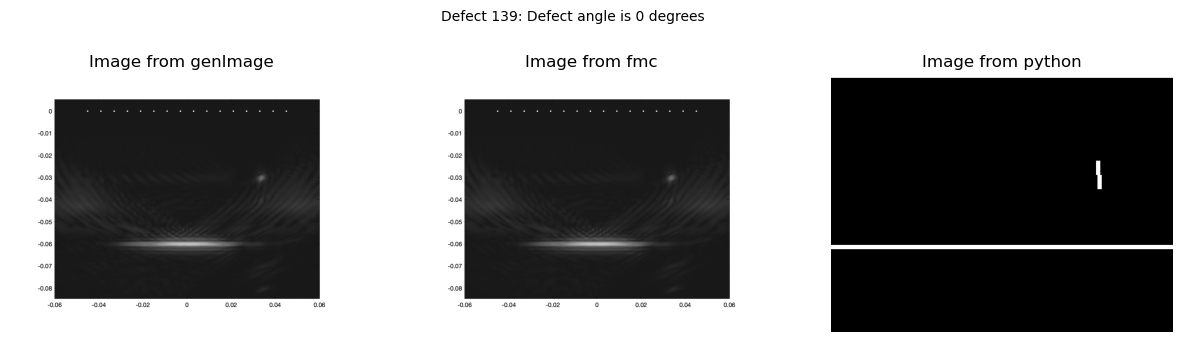

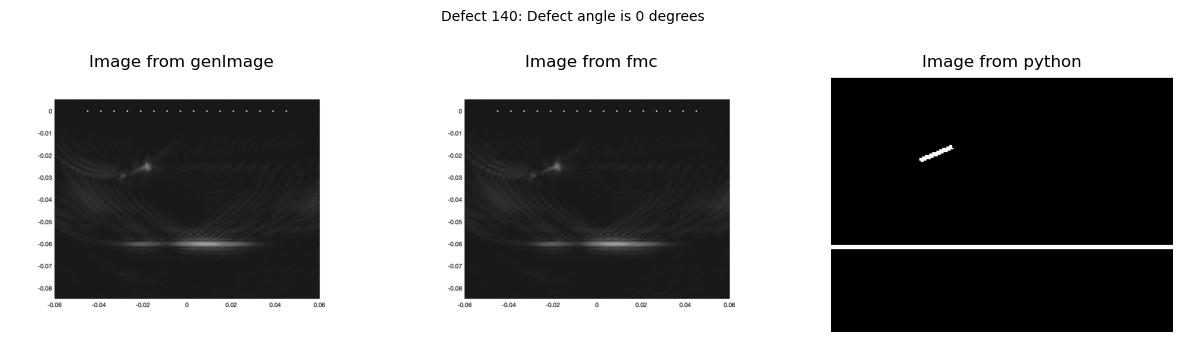

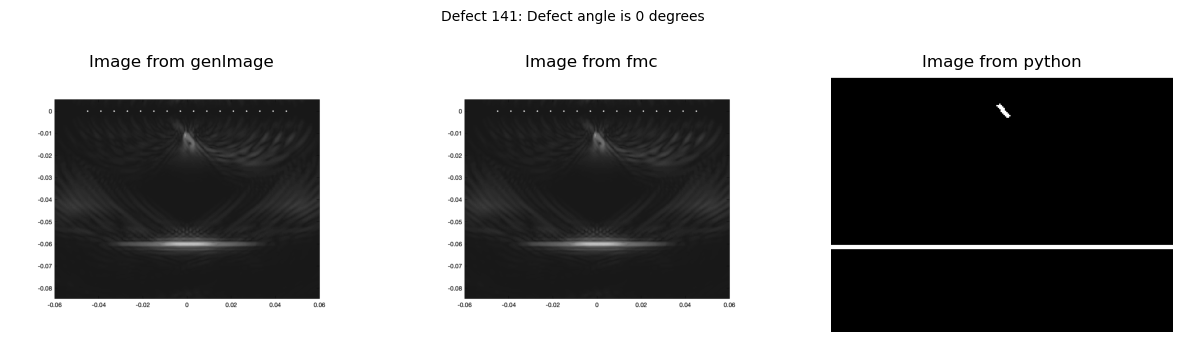

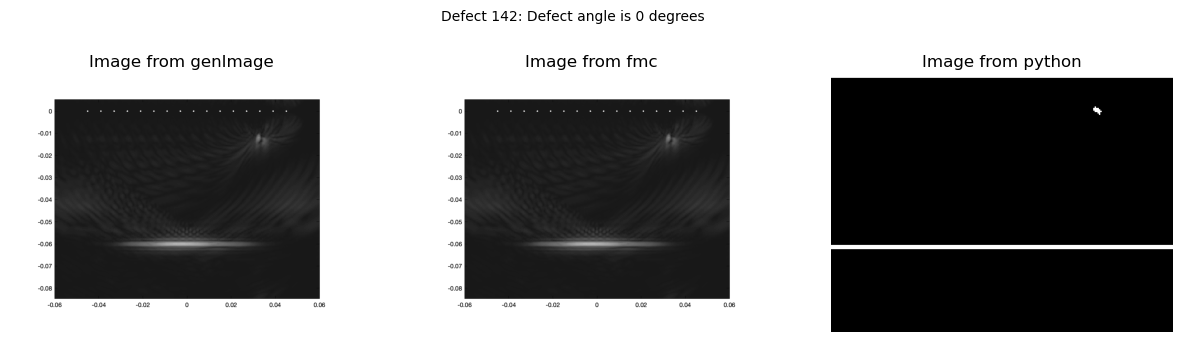

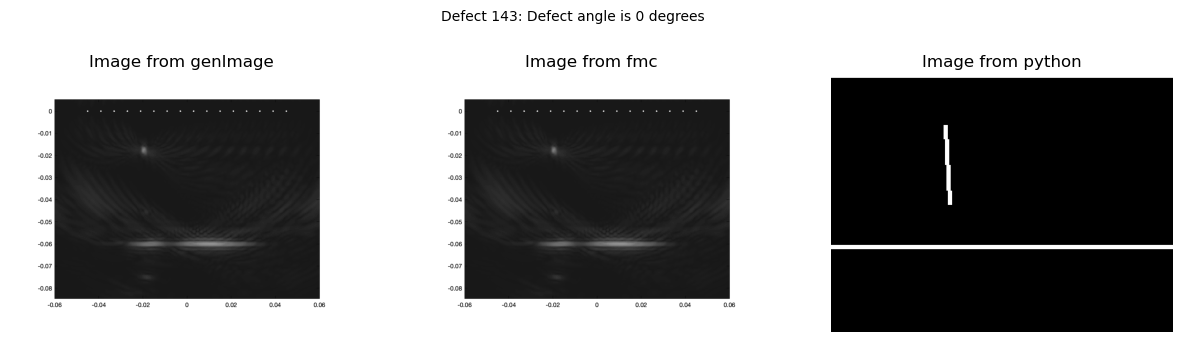

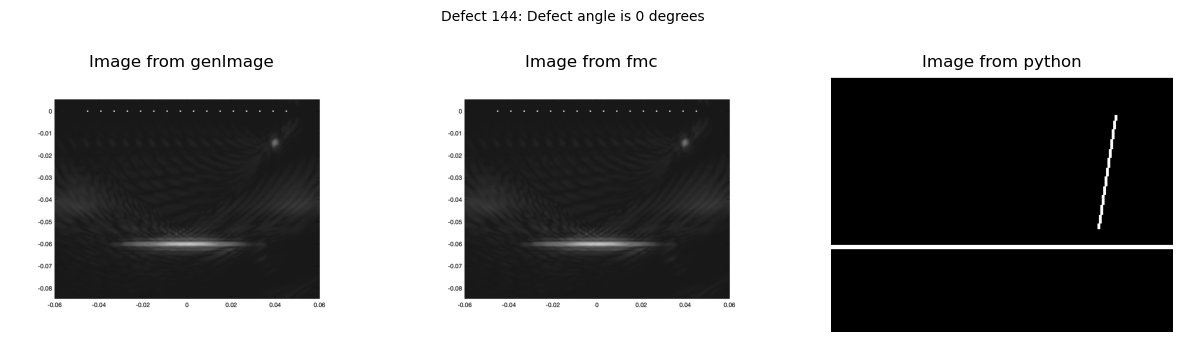

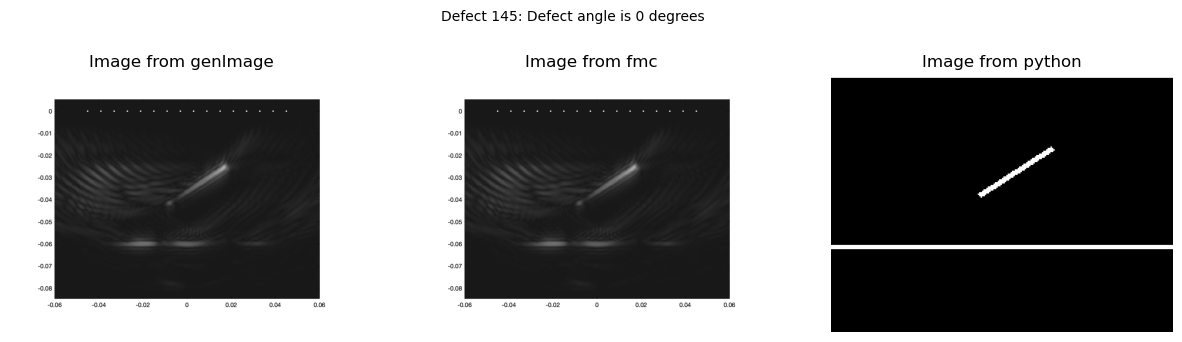

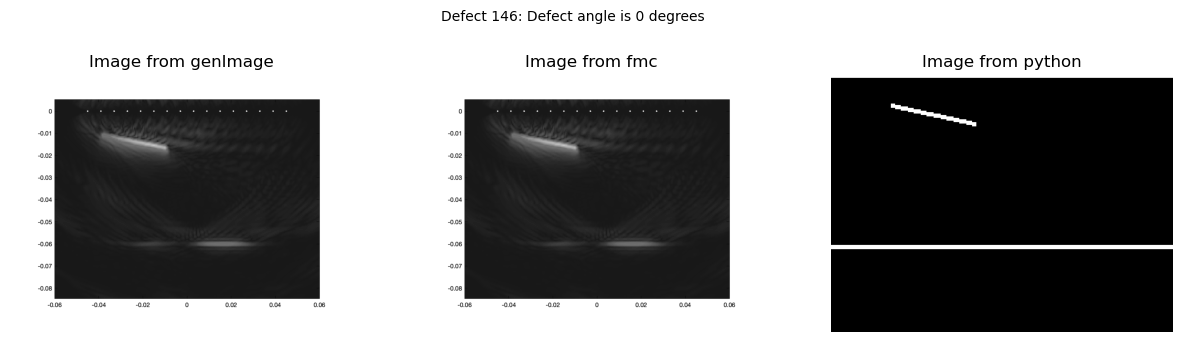

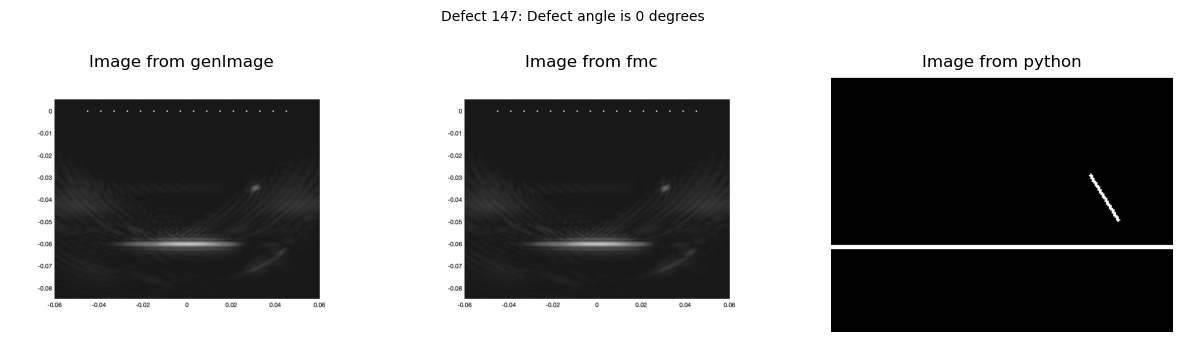

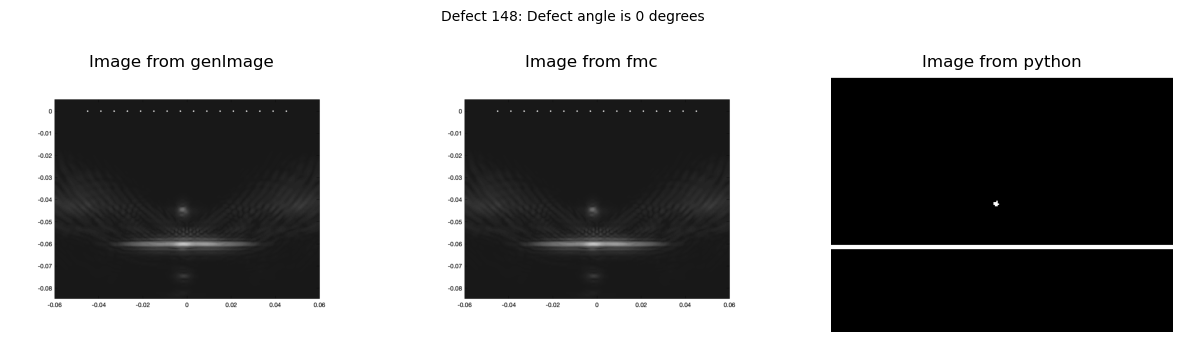

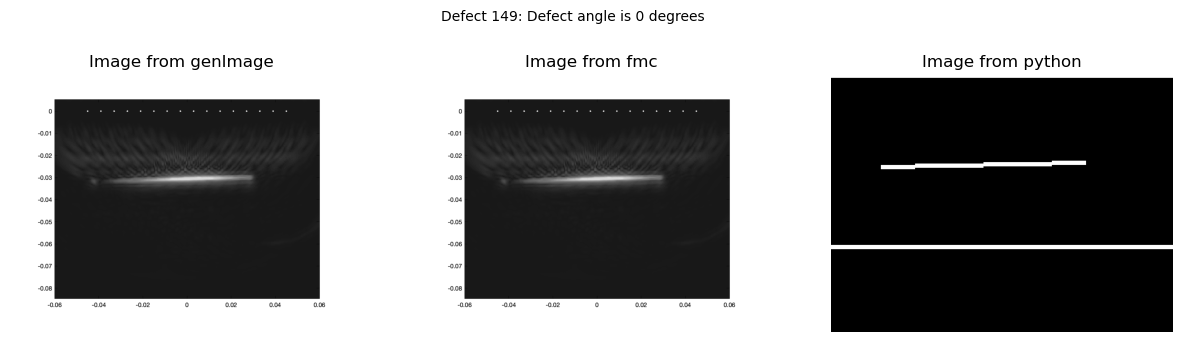

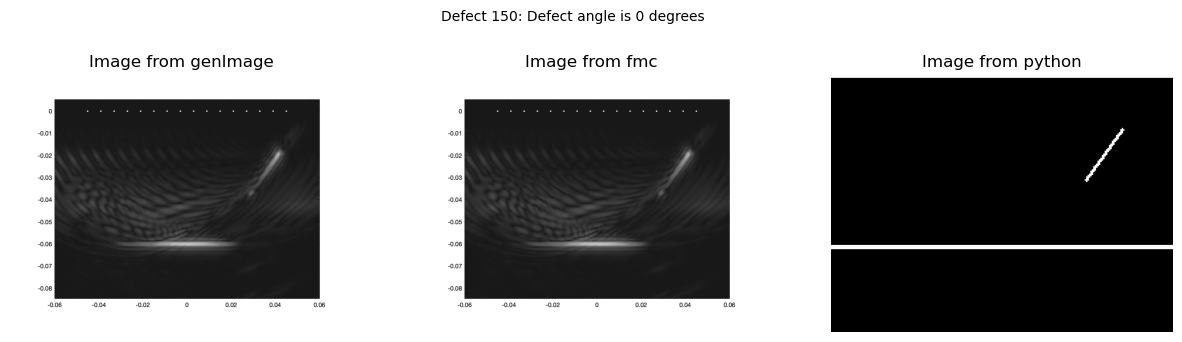

In [4]:
# Compare images generated by FMC or model output with python image

from matplotlib import pyplot as plt
from matplotlib import image as mpimg

dirName_das = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/DAS_Figure"
dirName_das_fmc = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/DAS_Figure_FMC"
dirName_py = "/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig"

#Sample defect from 101-15 (ONLY THIS RANGE HAS IMAGES IN THREE FORMAT: das, das_fmc and py)
sample_list = [i for i in range(101, 151)]

for i in sample_list:
    
    defect = list(df_concat.loc[i])
    defAng = round(defect[4])
    
    f = plt.figure(figsize=(15,4))
    
    # Read image in normal colorful scale
#     image_das = mpimg.imread(f'{dirName_das}/Figure_{i}.png')
#     image_das_fmc = mpimg.imread(f'{dirName_das_fmc}/Figure_{i}_fmc.png')
#     image_py = mpimg.imread(f'{dirName_py}/defect_{i}_yshift_60.png')
    
    # Read image in greyscale
    image_das = cv.imread(f'{dirName_das}/Figure_{i}.png',cv.IMREAD_GRAYSCALE)  # convert to array
    image_das_fmc = cv.imread(f'{dirName_das_fmc}/Figure_{i}_fmc.png',cv.IMREAD_GRAYSCALE)  # convert to array
    image_py = cv.imread(f'{dirName_py}/defect_{i}_yshift_60.png',cv.IMREAD_GRAYSCALE)  # convert to array
    
    
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    ax.imshow(image_das, cmap='gray')
    ax.set_title('Image from genImage')
    ax.axis('off')
    ax2.imshow(image_das_fmc, cmap='gray')
    ax2.set_title('Image from fmc')
    ax2.axis('off')
    ax3.imshow(image_py, cmap='gray')
    ax3.set_title('Image from python')
    ax3.axis('off')
    f.suptitle(f'Defect {i}: Defect angle is {defAng} degrees', fontsize=10)
    
    plt.show()

### Check all the training data files are complete

In [87]:
def check_file_completeness(file_path, index_range = [1, 2000], file_type ='.csv'):
    
    import re
    
    lower, upper = index_range
    desired_num_set = set([i for i in range(lower, upper + 1)])

    file_list = []
    for file in os.listdir(file_path):
        if file_type == '':
            if not file.endswith('.DS_Store'):
                file_list.append(file)
        else:
            # select the correct file type
            if file.endswith(file_type):
                file_list.append(file)

    numbers_in_file = []    
    for file_name in file_list:
        # extract the numbers using regex and append in numbers list, 
        # re.findall will return a list, we need to extract the 0th element
        numbers_in_file.append(int(re.findall(r"\d+", file_name)[0]))
    actual_num_set = set(numbers_in_file)


    print('Check 1: check number of files')
    if len(actual_num_set) == upper - lower + 1:
        print(f'--- Check 1 passed: There are {upper - lower + 1} unique files')
    else:
        print(f'!!! Check 1 failed: There are {len(file_list)} files, but we want {upper - lower + 1} files')


    print('Check 2: check additional files')
    # Check whether the actual data contains additional files
    additional_list = list(actual_num_set - desired_num_set)
    if additional_list == []:
        print(f'--- Check 2 passed: There are no additional files')
    else:
        print(f'!!! Check 2 failed: There are {len(additional_list)} additional files, which are {additional_list}')

    print('Check 3: check missing files')
    # Check whether there are missing files
    missing_list = list(desired_num_set - actual_num_set)
    if missing_list == []:
        print(f'--- Check 3 passed: There are no additional files')
    else:
        print(f'!!! Check 3 failed: There are {len(missing_list)} missing files, which are {missing_list}')
    

In [94]:
# Check defect record
check_file_completeness(file_path = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/defect_record", 
                        index_range = [1,2000], 
                        file_type = '.csv')

Check 1: check number of files
--- Check 1 passed: There are 2000 unique files
Check 2: check additional files
--- Check 2 passed: There are no additional files
Check 3: check missing files
--- Check 3 passed: There are no additional files


In [109]:
# Check model simplified output
check_file_completeness(file_path = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/models_output_simplified",
                        index_range = [1,2000], 
                        file_type = '')

Check 1: check number of files
--- Check 1 passed: There are 2000 unique files
Check 2: check additional files
--- Check 2 passed: There are no additional files
Check 3: check missing files
--- Check 3 passed: There are no additional files


In [100]:
# Check FMC files
check_file_completeness(file_path = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/FMC_variable",
                        index_range = [1,2000], 
                        file_type = '.mat')

Check 1: check number of files
--- Check 1 passed: There are 2000 unique files
Check 2: check additional files
--- Check 2 passed: There are no additional files
Check 3: check missing files
--- Check 3 passed: There are no additional files


In [112]:
# Check Das_figure_fmc files
check_file_completeness(file_path = "/Users/chenkangan/Desktop/ME4_FYP/imageGenerate_2022/DAS_Figure_FMC",
                        index_range = [1,2000], 
                        file_type = '.png')

Check 1: check number of files
--- Check 1 passed: There are 2000 unique files
Check 2: check additional files
--- Check 2 passed: There are no additional files
Check 3: check missing files
--- Check 3 passed: There are no additional files


In [61]:
# regex look up, sort the file names by removing the non-numerical elements in the filename
# 'defect_1.csv' will be sorted based on 1
file_list.sort(key = lambda f: int(re.sub('\D','', f)))